In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [7]:
iso2_to_country = {
    "BE":"Belgium",
    "BG":"Bulgaria",
    "CZ":"Czechia",
    "DK":"Denmark",
    "DE":"Germany",
    "EE":"Estonia",
    "IE":"Ireland",
    "EL":"Greece",
    "ES":"Spain",
    "FR":"France",
    "HR":"Croatia",
    "IT":"Italy",
    "CY":"Cyprus",
    "LV":"Latvia",
    "LT":"Lithuania",
    "LU":"Luxembourg",
    "HU":"Hungary",
    "MT":"Malta",
    "NL":"Netherlands",
    "AT":"Austria",
    "PL":"Poland",
    "PT":"Portugal",
    "RO":"Romania",
    "SI":"Slovenia",
    "SK":"Slovakia",
    "FI":"Finland",
    "SE":"Sweden"
}
iso2 = list(iso2_to_country.keys())

In [8]:
# clean and write data to csv
sj = pd.read_csv('sport_jobs_raw.csv')
sj.drop(["DATAFLOW","LAST UPDATE","freq","sex","unit","OBS_FLAG"], inplace=True, axis=1)
sj = sj[sj["geo"].isin(iso2)]
sj["geo"] = sj["geo"].apply(lambda x: iso2_to_country[x])
sj.rename(columns={'geo':"country", 'TIME_PERIOD':"year", "OBS_VALUE":"employed"}, inplace=True)
sj["employed"] = sj["employed"].apply(lambda x: int(x*10000))
sj.reset_index()
sj.head()

,country,year,employed
0,Austria,2011,251000
1,Austria,2012,240000
2,Austria,2013,258000
3,Austria,2014,278000
4,Austria,2015,359000


In [9]:
sj.to_csv("sports_jobs.csv", index=False)

,country,year,employed,neutral,home_win,away_win,games_played,goal_diff,win_rate,log_employed
0,Austria,2011,251000,0,1,0,6,-8,0.166667,12.433208
1,Austria,2012,240000,0,1,0,3,1,0.333333,12.388394
2,Austria,2013,258000,0,1,0,4,-5,0.250000,12.460715
3,Austria,2014,278000,0,0,0,1,0,0.000000,12.535376
4,Austria,2015,359000,0,0,1,1,3,1.000000,12.791078


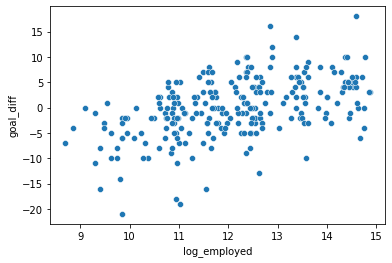

In [10]:
fb = pd.read_csv('../results_year.csv')
sj_fb = pd.merge(sj, fb, on=["country", "year"])
sj_fb["log_employed"] = np.log(sj_fb["employed"])
sns.scatterplot(data=sj_fb, x="log_employed", y="goal_diff")
sj_fb.head()

<AxesSubplot:xlabel='log_employed', ylabel='goal_diff'>

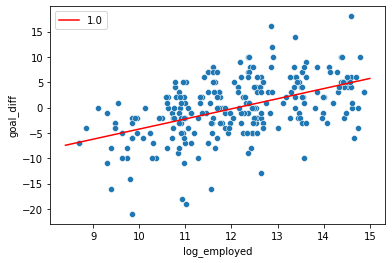

In [11]:
x = sj_fb["log_employed"].to_numpy().reshape((-1, 1))
y = sj_fb["goal_diff"]
l_reg = LinearRegression().fit(x, y)
sns.scatterplot(data=sj_fb, x="log_employed", y="goal_diff")

a,b = l_reg.coef_,l_reg.intercept_
x_line = np.linspace(8.4, 15, 100)
y_line = x_line * a + b
sns.lineplot(x=x_line, y=y_line, palette=['r'], hue=np.ones(100))

In [12]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              goal_diff   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     80.68
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           7.41e-17
Time:                        15:10:38   Log-Likelihood:                -748.49
No. Observations:                 246   AIC:                             1501.
Df Residuals:                     244   BIC:                             1508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.2039      2.714     -8.917      0.0